# Student CGPA prediction Project :

In [128]:
# First I importaed all the important libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [129]:
# Getting the dataset from the given link : 
df = pd.read_csv('student_cgpa.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Data Cleaning :

In [130]:
# First I will drop the column 'Seat No.'

df = df.drop(columns = 'Seat No.', axis = 1)

In [131]:
# Checking is there any null value present in  the  dataset :
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [132]:
# Here I can see so many null values are there .

# 1. I will remove all those columns which contains null values more than 10
# 2. Then I will remove all the rows with missing values less than 60

In [133]:
# 1.
wasted_columns = ['CS-406','CS-412']
new_df = df.drop(columns = wasted_columns , axis = 1)

In [134]:
# 2.
new_df = new_df.dropna(axis = 0)

In [135]:
new_df = new_df.reset_index(drop = True)

In [136]:
new_df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
CGPA         0
dtype: int64

In [137]:
# All  the columns contains ordinal data . So I will map all

In [138]:
size_mapping = {
    'A+' : 17,
    'A' : 16,
    'A-' : 15,
    'B+':14,
    'B': 13,
    'B-': 12,
    'C+': 11,
    'C': 10,
    'C-':9,
    'D+': 8,
    'D':7,
    'D-': 6,
    'E+': 5,
    'E': 4,
    'E-': 3,
    'F+': 2,
    'F' :1,
    'W': 0,
    'WU':0,
    'nan':0
}

def Values_encoding(df , columns):
    for i in columns  :
        df[i] = df[i].map(size_mapping)
    

In [139]:
# I will map all the columns except the 'CGPA' column :

Values_encoding(new_df , new_df.columns[:-1])

In [140]:
new_df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
0,12,8,9,10,9,8,7,9,12,9,...,9,10,9,9,9,9,16,9,13,2.205
1,16,7,8,7,12,10,7,16,8,7,...,15,7,8,7,10,7,12,10,10,2.008
2,16,13,16,12,14,16,12,14,15,15,...,15,15,13,13,16,10,16,16,15,3.608
3,7,11,8,7,7,15,8,9,7,11,...,14,9,8,10,8,9,13,11,11,1.906
4,15,15,15,14,16,16,15,14,16,15,...,12,15,12,14,14,12,16,15,15,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,13,16,16,15,17,16,15,15,17,14,...,16,14,15,15,16,16,14,14,13,3.798
553,17,16,16,16,16,16,16,15,16,16,...,17,15,14,14,16,16,13,15,10,3.772
554,13,16,15,14,16,16,16,16,16,13,...,11,14,15,13,16,14,10,14,15,3.470
555,16,14,7,16,7,8,12,9,12,9,...,12,14,7,13,13,9,10,13,12,2.193


In [141]:
new_df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-414       0
CS-419       0
CS-423       0
CGPA         0
dtype: int64

In [142]:
# Checking the information of the new_df :
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     557 non-null    int64  
 1   HS-101     557 non-null    int64  
 2   CY-105     557 non-null    int64  
 3   HS-105/12  557 non-null    int64  
 4   MT-111     557 non-null    int64  
 5   CS-105     557 non-null    int64  
 6   CS-106     557 non-null    int64  
 7   EL-102     557 non-null    int64  
 8   EE-119     557 non-null    int64  
 9   ME-107     557 non-null    int64  
 10  CS-107     557 non-null    int64  
 11  HS-205/20  557 non-null    int64  
 12  MT-222     557 non-null    int64  
 13  EE-222     557 non-null    int64  
 14  MT-224     557 non-null    int64  
 15  CS-210     557 non-null    int64  
 16  CS-211     557 non-null    int64  
 17  CS-203     557 non-null    int64  
 18  CS-214     557 non-null    int64  
 19  EE-217     557 non-null    int64  
 20  CS-212    

In [143]:
# Checking the description of the new_df :
new_df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-414,CS-419,CS-423,CGPA
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,...,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,13.136445,11.856373,13.938959,12.734291,13.050269,14.089767,12.906643,13.021544,13.073609,12.154399,...,11.877917,12.766607,12.962298,12.030521,13.369838,11.346499,14.204668,13.008977,12.829443,2.982995
std,2.862443,2.707075,2.663342,3.042468,2.755176,2.407838,2.474745,2.852407,2.425873,3.001415,...,3.230837,2.828955,3.318308,2.794033,2.605270,3.034610,2.615211,2.277097,2.768917,0.588210
min,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,0.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,1.658000
25%,11.000000,10.000000,13.000000,10.000000,11.000000,13.000000,12.000000,11.000000,11.000000,10.000000,...,10.000000,11.000000,10.000000,10.000000,12.000000,10.000000,13.000000,12.000000,11.000000,2.570000
50%,14.000000,12.000000,15.000000,13.000000,14.000000,15.000000,13.000000,14.000000,14.000000,13.000000,...,12.000000,13.000000,14.000000,12.000000,14.000000,12.000000,15.000000,13.000000,13.000000,3.043000
75%,15.000000,14.000000,16.000000,15.000000,15.000000,16.000000,15.000000,15.000000,15.000000,15.000000,...,14.000000,15.000000,16.000000,14.000000,16.000000,13.000000,16.000000,15.000000,15.000000,3.458000
max,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,3.985000


# EDA :

<Axes: xlabel='PH-121', ylabel='CGPA'>

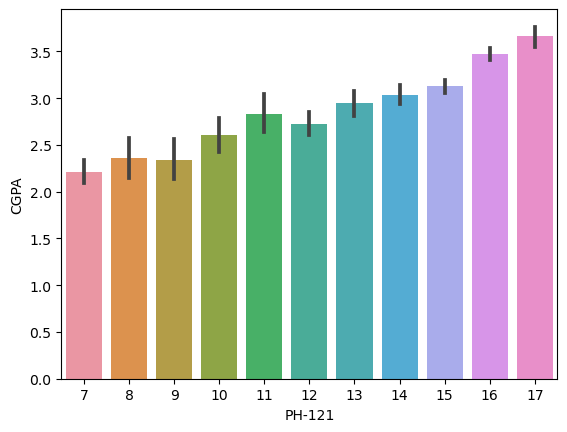

In [144]:
# Performing some EDA :
sns.barplot(data = new_df , x = 'PH-121',  y = 'CGPA',)

<Axes: xlabel='HS-101', ylabel='CGPA'>

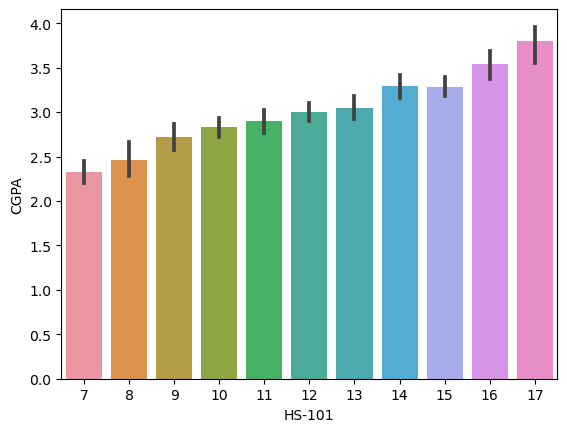

In [145]:
sns.barplot(data = new_df , x = 'HS-101',  y = 'CGPA',)

# Feature Importance :

In [146]:
# I will do feature selection Using Random Forest :
X = new_df.drop(columns = 'CGPA' , axis = 1)
y = new_df['CGPA']

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3)

 1) CS-317                         0.441440
 2) CS-215                         0.120112
 3) CS-210                         0.074091
 4) EL-332                         0.042867
 5) CS-306                         0.032407
 6) CS-214                         0.027709
 7) CS-301                         0.027467
 8) EE-217                         0.022934
 9) MT-222                         0.018873
10) MT-224                         0.016768
11) MT-111                         0.014704
12) CS-107                         0.014044
13) ME-107                         0.012118
14) EL-102                         0.010848
15) CS-421                         0.010696
16) CS-302                         0.009523
17) CS-211                         0.007896
18) CS-105                         0.007735
19) PH-121                         0.007462
20) CS-419                         0.007436
21) HS-304                         0.006546
22) CY-105                         0.006400
23) CS-212                      

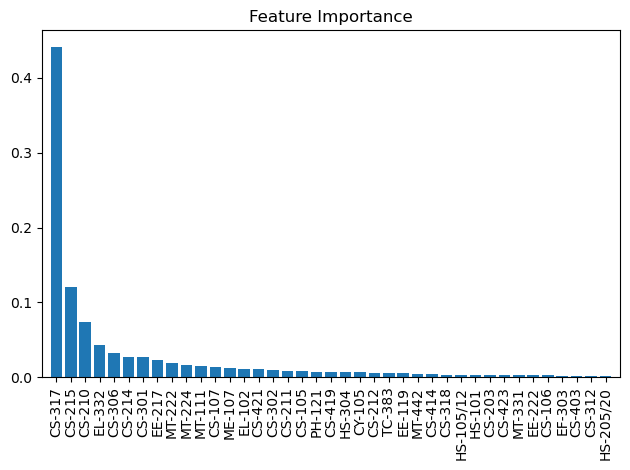

In [149]:
# ( I have taken this code from My book 'Python Machine Learning by Sebastine Raschka & Vahid Mirjalili')
from sklearn.ensemble import RandomForestRegressor

feat_labels = X.columns

forest = RandomForestRegressor(n_estimators = 500 , random_state =1)

forest.fit(X_train , y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1 , 30,
                           feat_labels[indices[f]],
                           importances[indices[f]]))
    
    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align = 'center')

plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation = 90)
plt.xlim([-1 , X_train.shape[1]])

plt.tight_layout()
plt.show()
    

In [150]:
# Hence I will take the first 10 most important columns for further process . 

In [151]:
top_features = feat_labels[indices[:10]]
n_df = X[top_features]
n_df['CGPA'] = new_df['CGPA']
n_df

C:\Users\admin\AppData\Local\Temp\ipykernel_13296\3284715529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['CGPA'] = new_df['CGPA']


,CS-317,CS-215,CS-210,EL-332,CS-306,CS-214,CS-301,EE-217,MT-222,MT-224,CGPA
0,9,9,11,10,10,7,13,16,7,12,2.205
1,7,7,8,10,7,7,15,12,12,8,2.008
2,13,16,16,14,15,15,14,16,16,16,3.608
3,10,7,10,8,9,7,7,8,8,7,1.906
4,14,15,15,15,15,15,12,16,16,15,3.448
...,...,...,...,...,...,...,...,...,...,...,...
552,15,15,16,16,14,16,15,16,17,16,3.798
553,14,13,16,16,15,17,16,16,11,13,3.772
554,13,13,15,13,14,13,14,16,13,13,3.470
555,13,8,12,7,14,10,10,12,7,13,2.193


In [154]:
# Checking if there any duplicate row presents ?
n_df.duplicated().any()

False

# Using different models :

In [155]:
X = n_df.iloc[:,0:-1]
y = n_df.iloc[:,-1]

In [238]:
# Importing different models :
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model  import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

# Using Linear Models  :

In [158]:
lr_results = []
sgd_results = []
l_results = []
r_results = []

# Checking the best random_state values for each models :
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = i)
    lr = LinearRegression()
    lr.fit(X_train , y_train)
    y_pred = lr.predict(X_test)
    lr_results.append(r2_score(y_test , y_pred))
    
    sgd = SGDRegressor()
    sgd.fit(X_train , y_train)
    y_pred = sgd.predict(X_test)
    sgd_results.append(r2_score(y_test , y_pred))
    
    l = Lasso()
    l.fit(X_train , y_train)
    y_pred = l.predict(X_test)
    l_results.append(r2_score(y_test , y_pred))
    
    r = Ridge()
    r.fit(X_train , y_train)
    y_pred = r.predict(X_test)
    r_results.append(r2_score(y_test , y_pred))

In [159]:
# Checking the best random_state for Linear Regression :
np.argmax(lr_results)

58

In [108]:
# Checking the r2_score at that random_state :
lr_results[np.argmax(lr_results)]

0.9617537686829553

In [163]:
# LinearRegression showing overfitting here in this dataset :

In [110]:
# Checking the best random_state for Lasso regression :
np.argmax(l_results)

55

In [111]:
# Checking the r2_score at that value of random_state :
l_results[np.argmax(l_results)]

0.4655319757126567

In [162]:
# Lasso is not relaiable

In [112]:
# Checking  the best random_state for Ridge :
np.argmax(r_results)

39

In [113]:
# Checking the r2_score at that point :
r_results[np.argmax(r_results)]

0.9617537446204979

In [161]:
# Ridge is showing overfitting :

In [124]:
X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X,y,test_size = 0.3 , random_state = 39)

In [127]:
LR = LinearRegression()
LR.fit(X_train1 , y_train1)
y_pred_LR = LR.predict(X_test1)
print('r2 score of LR is :',r2_score(y_test1 , y_pred_LR))

r2 score of LR is : 0.9617537686829553


In [160]:
# LinearRegression is showing Overfitting :

# Using SVR & KNN :

In [174]:
svr_results = []
knn_results = []

for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = i)
    svr = SVR(C = 0.1 , kernel = 'rbf')
    svr.fit(X_train , y_train)
    y_pred = svr.predict(X_test)
    svr_results.append(r2_score(y_test , y_pred))
    
    knn = KNeighborsRegressor(n_neighbors = 4 , weights = 'uniform')
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    knn_results.append(r2_score(y_test , y_pred))

In [175]:
np.argmax(svr_results)

39

In [176]:
svr_results

[0.8950767354964513,
 0.9236552222843666,
 0.9155756941013808,
 0.8991097201142231,
 0.9056429212477252,
 0.9070376447230087,
 0.9071834536033264,
 0.9218304938214618,
 0.9042339600034489,
 0.9153009742025148,
 0.9076337224858535,
 0.9249984744468862,
 0.9174391514945822,
 0.8802799049876362,
 0.9217643457570737,
 0.9155378290358205,
 0.9144181186668927,
 0.8961120543836514,
 0.9115248536812719,
 0.9072018494371081,
 0.9036772261833766,
 0.8995269142041776,
 0.8971222923288356,
 0.900110112949149,
 0.9029608062740992,
 0.8816532509458634,
 0.8912096437752538,
 0.913647842359206,
 0.8882611501936651,
 0.913351666741765,
 0.9050130963854681,
 0.9250262627747649,
 0.9177267501483218,
 0.9161617743287984,
 0.921316591560794,
 0.9092565498859985,
 0.9173246222821011,
 0.8992094381227218,
 0.9076342149942495,
 0.9360340582839457,
 0.9118141086582656,
 0.9055348256391278,
 0.924625199095376,
 0.9149652914675741,
 0.9112406438080775,
 0.9226602662822939,
 0.9148765481901201,
 0.903388854874302

In [177]:
# SVR is little bit relaiable if we give a random_state values for which the result becomes less than 90 in train_test_split 

In [178]:
svr_results[np.argmax(svr_results)]

0.9360340582839457

In [179]:
np.argmax(knn_results)

58

In [180]:
knn_results[np.argmax(knn_results)]

0.9436154624890755

In [181]:
knn_results

[0.9263327873571846,
 0.9402162318011441,
 0.91962146586128,
 0.9103999046967679,
 0.9302921125581707,
 0.9206296362219679,
 0.914397975800019,
 0.9397890048143576,
 0.9295780043048152,
 0.9167258527146479,
 0.9293169079848056,
 0.9363031142936169,
 0.934189051235365,
 0.9281735382679233,
 0.9209318551373021,
 0.9219780635420183,
 0.9357152707140953,
 0.921417214627287,
 0.9225075941809231,
 0.9219997738368584,
 0.9319771407038386,
 0.9241232753259815,
 0.9303049467838208,
 0.9329152606769194,
 0.9199635098729054,
 0.9383924896773995,
 0.9259694189070984,
 0.9157304431100574,
 0.9063018500861072,
 0.9302402945134816,
 0.9231888951552343,
 0.9259852408825667,
 0.9267968351369337,
 0.9338115284282839,
 0.9272784272437707,
 0.9210920047477273,
 0.940374355302615,
 0.9242367936405059,
 0.9274654155562954,
 0.9396034390013546,
 0.9329829246477058,
 0.94018162289144,
 0.9284656175079247,
 0.9351803215551356,
 0.9312264466761093,
 0.9188690868075942,
 0.922072582167335,
 0.9253894607841333,
 

In [ ]:
# KNN is showing overfitting .

# Using DecisionTree Regression :

In [183]:
Dt_results = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = i)
    dt = DecisionTreeRegressor(max_depth = 5)
    dt.fit(X_train , y_train)
    y_pred = dt.predict(X_test)
    Dt_results.append(r2_score(y_test , y_pred))

In [184]:
# Checking the best random_state value for DecisionTree Regressor :
np.argmax(Dt_results)

62

In [185]:
Dt_results[np.argmax(Dt_results)]

0.8715285538418915

In [186]:
X_train5 , X_test5 , y_train5 , y_test5 = train_test_split(X,y , test_size = 0.3 , random_state = 7)

In [214]:
# Checking the best parameters for DecisionTreeRegression :
param_grid = {
    'max_depth': [4,5,7,8],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
}

grid_search_dt = GridSearchCV(dt, param_grid, cv=5)
grid_search_dt.fit(X_train5, y_train5)

y_pred_dt = grid_search_dt.best_estimator_.predict(X_test5)

accuracy = r2_score(y_test5, y_pred_dt)
print("Accuracy score of DecisionTreeRegression :", accuracy)

Accuracy score of DecisionTreeRegression : 0.8701058986920345


In [215]:
print('best models :',grid_search_dt.best_params_)

best models : {'criterion': 'squared_error', 'max_depth': 8}


In [222]:
DT = DecisionTreeRegressor(criterion = 'friedman_mse' ,max_depth = 7)
DT.fit(X_train1 , y_train1)
y_pred_DT = DT.predict(X_test1)
print('r2_score of DT :',r2_score(y_test1 , y_pred_DT))

r2_score of DT : 0.8309977952153677


# Using RandomForest Regressor :

In [86]:
rf_results = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = i)
    rf = RandomForestRegressor(n_estimators = 100 , max_depth = 10)
    rf.fit(X_train , y_train)
    y_pred = rf.predict(X_test)
    rf_results.append(r2_score(y_test , y_pred))

In [87]:
np.argmax(rf_results)

54

In [88]:
rf_results[np.argmax(rf_results)]

0.9535753028145217

In [90]:
X_train6 , X_test6 , y_train6 , y_test6 = train_test_split(X,y , test_size = 0.3 , random_state = 54)

In [92]:
# Finding the best Hyperperemeters :
param_grid = {
    'n_estimators':[100 , 300],
    'max_depth': [ 7, 8 , 10 , 15 ],
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5)
grid_search_rf.fit(X_train6, y_train6)

y_pred_rf = grid_search_rf.best_estimator_.predict(X_test6)

accuracy = r2_score(y_test6, y_pred_rf)
print("r2 score of Random Forest Regressor :", accuracy)

r2 score of Random Forest Regressor : 0.9514088522378916


In [94]:
print('best parameters are :',grid_search_rf.best_params_)

best parameters are : {'max_depth': 10, 'n_estimators': 100}


In [96]:
RF = RandomForestRegressor(max_depth = 10 , n_estimators = 100)
RF.fit(X_train6 , y_train6)
y_pred_RF = RF.predict(X_test6)
print(r2_score(y_test6 , y_pred_RF))

0.9529685413882405


In [223]:
# RandomForest is Showing Overfitting 

# Using GradienBoosting Regression :

In [225]:
gb_results = []
for i in range(100):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = i)
    gb = GradientBoostingRegressor(n_estimators = 100 , max_depth = 1)
    gb.fit(X_train , y_train)
    y_pred = gb.predict(X_test)
    gb_results.append(r2_score(y_test , y_pred))

In [226]:
np.argmax(gb_results)

39

In [227]:
gb_results[np.argmax(gb_results)]

0.9445245763602587

In [228]:
gb_results

[0.927957062422202,
 0.9363047054641733,
 0.923368256595854,
 0.9242532611295424,
 0.9298734248367051,
 0.9205751656882809,
 0.9282395959455472,
 0.9199682610508191,
 0.9202543689933114,
 0.9288655764120027,
 0.9127491953354112,
 0.9385395515349002,
 0.924817450531499,
 0.9230395419312206,
 0.9336490917069927,
 0.9164669164883837,
 0.9306958918120528,
 0.9188237002733641,
 0.9144227710133926,
 0.9310103536195342,
 0.9424150992725152,
 0.9378897140244371,
 0.9239806602102657,
 0.9296642276651002,
 0.9076113515281247,
 0.9232808940328179,
 0.9299588079315712,
 0.9188827061025823,
 0.9172954152595794,
 0.9244256589166734,
 0.9319248822443769,
 0.931338423898504,
 0.9253173296903966,
 0.9285295386537983,
 0.9383527756183768,
 0.9213690543956036,
 0.9270362437086761,
 0.9037709096780328,
 0.9320833229731711,
 0.9445245763602587,
 0.9303418209589354,
 0.9348632377938351,
 0.9267609560325836,
 0.926280771204023,
 0.936056254426104,
 0.9212710030667921,
 0.9251665876792197,
 0.9369848972877999

In [237]:
# GradientBoosting is also showing Overfitting .

In [241]:
# After seeing the model performances , I whould go for SVR giving the random_state = 13

X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X,y , test_size = 0.30 , random_state = 13)
Svr = SVR(C = 0.1 , kernel = 'rbf')
Svr.fit(X_train2 , y_train2)
y_pred_Svr = Svr.predict(X_test2)
print(r2_score(y_test2 , y_pred_Svr))

0.8802799049876362


# Creating a prediction function :

In [249]:
def CGPA_Prediction(p):
    p = p.reshape(1,-1)
    pred = Svr.predict(p)
    print('The grade is :',pred)

In [251]:
p = np.array([11,	10,	14,	15,	13,	13,	11,	15,	10,	9])
CGPA_Prediction(p)

The grade is : [2.89661665]


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [243]:
n_df.sample(10)

,CS-317,CS-215,CS-210,EL-332,CS-306,CS-214,CS-301,EE-217,MT-222,MT-224,CGPA
410,12,13,14,15,14,13,13,14,15,14,3.290
486,17,17,17,17,17,16,17,16,17,16,3.970
45,8,7,7,7,7,8,11,8,7,7,1.996
64,11,10,14,15,13,13,11,15,10,9,2.822
94,16,16,17,17,16,15,16,17,17,17,3.963
359,13,11,16,16,16,15,16,16,12,15,3.618
146,10,12,12,14,15,12,12,14,11,11,2.936
292,12,13,14,12,13,13,13,15,8,12,2.736
501,10,16,15,10,9,8,12,11,16,11,2.489
416,17,17,17,17,16,16,17,16,16,16,3.985
